#Basic SVC Implementation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
from sklearn.datasets import make_classification

In [4]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [6]:
X.shape

(1000, 2)

In [8]:
y.shape

(1000,)

In [10]:
pd.DataFrame(X)[0]

0     -1.591646
1     -0.508005
2     -0.634462
3      0.902474
4     -0.775326
         ...   
995    3.673142
996   -2.097566
997   -1.480527
998   -0.865722
999   -0.853494
Name: 0, Length: 1000, dtype: float64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

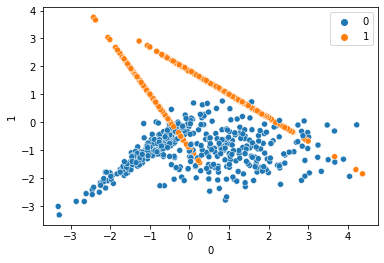

In [12]:
sns.scatterplot(pd.DataFrame(X)[0],pd.DataFrame(X)[1],hue=y)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [16]:
X_train.shape

(750, 2)

In [19]:
y_train.shape

(750,)

In [20]:
from sklearn.svm import SVC

In [21]:
svc = SVC(kernel='linear')

In [22]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [23]:
svc.coef_

array([[0.17421591, 2.05526557]])

In [24]:
y_pred = svc.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       126
           1       0.95      0.85      0.90       124

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [28]:
print(confusion_matrix(y_test,y_pred))

[[121   5]
 [ 18 106]]


#Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}

In [31]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [32]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [33]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [34]:
y_pred1 = grid.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       126
           1       0.96      0.94      0.95       124

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[121   5]
 [  7 117]]
